In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
torch.cuda.memory_cached()


0

In [50]:
# transform = transforms.ToTensor()
train_data = datasets.MNIST(root = './', train=True, download = True, transform = transform)

TypeError: object() takes no parameters

In [40]:
test_data = datasets.MNIST(root= './', train=False, download = True, transform = transform)

True

In [4]:
train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 100, shuffle = False)

from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [5]:
for images, labels in train_loader:
    break

In [6]:
class CNN(nn.Module):
    
    def __init__(self, in_sz = 784, out_sz = 10, layers = [120,84]):
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=1)

In [54]:
model = CNN()

gpumodel = model.cuda()
print(next(gpumodel.parameters()).is_cuda)
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

images.view(100, -1)

True
CNN(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [8]:
import time
start_time = time.time()

epochs = 10
train_losse = []
test_losses = []
train_correct = []
test_correct = []

def train():
    for i in range(epochs):
        tr_corr, tst_corr = 0,0
        
        for b, (x_train, y_train) in enumerate(train_loader):
            b+=1
            y_pred = model(x_train.view(100,-1))
            loss = criterion(y_pred, y_train)
            predicted = torch.max(y_pred.data,1)[1]
            batch_corr = (predicted==y_train).sum()
            tr_corr += batch_corr
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if b%200==0:
                acc = tr_corr.item()*100/(100*b)
                print(f'Epoch {i} batch {b} loss: {loss.item()} accuracy: {acc}')
                
        train_losse.append(loss)
        train_correct.append(tr_corr)
        
    with torch.no_grad():
        for b, (x_test, y_test) in enumerate(test_loader):
            y_val = model(x_test.view(100,-1))
            
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr +=(predicted==y_test).sum()
            
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)
        
train()
total_time = time.time()-start_time
print(f'Duration:{total_time/60}')

Epoch 0 batch 200 loss: 0.29028379917144775 accuracy: 82.465
Epoch 0 batch 400 loss: 0.33517369627952576 accuracy: 87.2325
Epoch 0 batch 600 loss: 0.21639135479927063 accuracy: 89.39333333333333
Epoch 1 batch 200 loss: 0.14989019930362701 accuracy: 94.87
Epoch 1 batch 400 loss: 0.14257687330245972 accuracy: 95.175
Epoch 1 batch 600 loss: 0.07026278972625732 accuracy: 95.445
Epoch 2 batch 200 loss: 0.1807919442653656 accuracy: 96.39
Epoch 2 batch 400 loss: 0.027944209054112434 accuracy: 96.5875
Epoch 2 batch 600 loss: 0.1363254189491272 accuracy: 96.75833333333334
Epoch 3 batch 200 loss: 0.28055787086486816 accuracy: 97.505
Epoch 3 batch 400 loss: 0.05271807685494423 accuracy: 97.5375
Epoch 3 batch 600 loss: 0.10370839387178421 accuracy: 97.51833333333333
Epoch 4 batch 200 loss: 0.0944184809923172 accuracy: 98.09
Epoch 4 batch 400 loss: 0.0371786504983902 accuracy: 98.0425
Epoch 4 batch 600 loss: 0.04599601402878761 accuracy: 97.95333333333333
Epoch 5 batch 200 loss: 0.02261880226433277

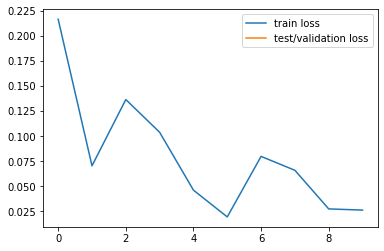

In [9]:
plt.plot(train_losse, label = 'train loss')
plt.plot(test_losses, label = 'test/validation loss')
plt.legend()


In [11]:
# train_accuracy = [t/100 for t in tr_corr]
# test_accuracy = [t/100 for t in tst_corr]
# plt.plot(train_accuracy, label = 'train accuracy')
# plt.plot(test_accuracy, label = 'train accuracy')
# plt.legend()

In [12]:
#new unseen data

test_data_load = DataLoader(test_data, batch_size= 1000, shuffle = False)
with torch.no_grad():
    correct = 0
    
    for x_test, y_test in test_data_load:
        y_val = model(x_test.view(len(x_test), -1))
        predicted = torch.max(y_val,1 )[1]
        correct += (predicted==y_test).sum()
        


In [13]:
correct.item()/len(test_data)

0.976

In [14]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 101,    0,    1,    0,    1,    0,    0,    0,    0,    0],
       [   1,  119,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   93,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    1,  100,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,   88,    0,    0,    0,    0,    1],
       [   0,    0,    1,    0,    0,   83,    1,    0,    1,    0],
       [   0,    0,    0,    0,    0,    2,   99,    0,    0,    0],
       [   0,    0,    0,    0,    2,    0,    0,  111,    0,    0],
       [   0,    0,    3,    2,    1,    0,    1,    0,   93,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   89]],
      dtype=int64)

## Actual CNN starts now

The imports stay the same

In [15]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root='./', train = False, download=True, transform=transform)

batch_size = 10
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = False)

In [16]:
#play around

conv1 = nn.Conv2d(1,6,3,1, padding = 1) #channels, out_features, kernel_size, step_size
conv2 = nn.Conv2d(6,16,3,1)

for i, (x_train, y_train) in enumerate(train_data):
    break
    
x = x_train.view(1,1,28,28)
x = F.relu(conv1(x))
x = F.max_pool2d(x,2,2)
x = F.relu(conv2(x))
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 6, 6])

In [17]:
x.view(-1,16*6*6).shape

torch.Size([1, 576])

In [18]:
class ConvoNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x,dim=1)        

In [19]:
model = ConvoNetwork()

for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
9600
80
800
10


In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

import time
start_time = time.time()


epochs = 5
train_losses, test_losses = [],[]
train_correct, test_correct = [], []


for i in range(epochs):
    trn_corr, tst_corr = 0,0
    
    for b, (x_train, y_train) in enumerate(train_loader):
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted==y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600==0:
            print(f'Epoch {i}, Batch: {b}, Loss: {loss.item()}')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (x_test, y_test) in enumerate(test_loader):
            y_val = model(x_test)
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted==y_test).sum()
            
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)
    
    
current_time = time.time()
total = current_time-start_time
print(f'Training Took {total/60} minutes')

Epoch 0, Batch: 0, Loss: 2.3176300525665283
Epoch 0, Batch: 600, Loss: 0.2516046166419983
Epoch 0, Batch: 1200, Loss: 0.030596276745200157
Epoch 0, Batch: 1800, Loss: 0.025150394067168236
Epoch 0, Batch: 2400, Loss: 0.8244816064834595
Epoch 0, Batch: 3000, Loss: 0.022961150854825974
Epoch 0, Batch: 3600, Loss: 0.0040255202911794186
Epoch 0, Batch: 4200, Loss: 0.0014440255472436547
Epoch 0, Batch: 4800, Loss: 0.005586707498878241
Epoch 0, Batch: 5400, Loss: 0.21500372886657715
Epoch 1, Batch: 0, Loss: 0.015570727176964283
Epoch 1, Batch: 600, Loss: 0.0682571530342102
Epoch 1, Batch: 1200, Loss: 0.01784384436905384
Epoch 1, Batch: 1800, Loss: 0.033206965774297714
Epoch 1, Batch: 2400, Loss: 0.13020098209381104
Epoch 1, Batch: 3000, Loss: 0.026346910744905472
Epoch 1, Batch: 3600, Loss: 0.007125826086848974
Epoch 1, Batch: 4200, Loss: 0.0001094170511350967
Epoch 1, Batch: 4800, Loss: 0.0012267889687791467
Epoch 1, Batch: 5400, Loss: 0.011105889454483986
Epoch 2, Batch: 0, Loss: 0.00013061

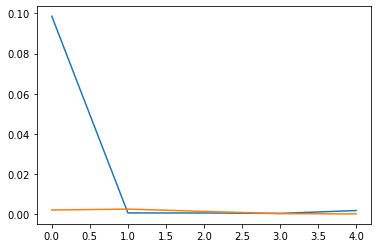

In [21]:
plt.plot(train_losses)
plt.plot(test_losses)

In [22]:
test_load_new = DataLoader(test_data, batch_size = 10000, shuffle = False)
correct = 0
for x_test, y_test in test_load_new:
    y_val = model(x_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted==y_test).sum()
    

In [23]:
correct.item()/len(test_data)

0.9891

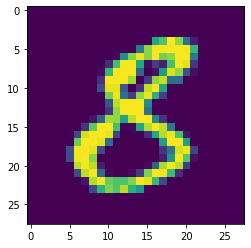

In [24]:
#let's try running a single image

plt.imshow(test_data[1234][0].reshape(28,28))


In [25]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[1234][0].view(1,1,28,28))

In [26]:
new_prediction.argmax()

tensor(8)

In [36]:
import warnings#
import os
import pandas as pd
warnings.filterwarnings('ignore')

path = '../Data/CATS_DOGS/CATS_DOGS'
# path = './'
img_names = []
for folder,subfolders,filenames in os.walk(path):
    for ing in filenames:
        break
        img_names.append(folder+'/'+img)
        
len(img_names)

0

In [38]:
img_size = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_size.append(img.size)
    except:
        rejected.append(item)
            
    
df = pd.DataFrame(img_size)
df.describe()

ValueError: Cannot describe a DataFrame without columns

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image

num_epochs = 10
learning_rate = 1e-3
batch_size = 32

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

trainset = datasets.CIFAR10(
    root='./data',
    train=True, 
    download=True,
    transform=transform
)
testset = datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
trainloader = DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)
testloader = DataLoader(
    testset, 
    batch_size=batch_size, 
    shuffle=True
)

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device
def make_dir():
    image_dir = 'Conv_CIFAR10_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
def save_decoded_image(img, name):

    img = img.view(img.size(0), 3, 32, 32)
    save_image(img, name)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        #encoder
        self.enc1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3)
        
        self.enc2 = nn.Conv2d(in_channels = 8, out_channels = 4, kernel_size = 3)

        #decoder
        self.dec1 = nn.ConvTranspose2d(in_channels=4, out_channels=8, kernel_size = 3)

        self.dec2 = nn.ConvTranspose2d(in_channels=8, out_channels = 3, kernel_size = 3)

    def forward(self,x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        return x

def train(net, trainloader, num_epochs):
    train_loss = []
    for epoch in range(num_epochs):
        running_loss = 0
        for data in trainloader:
            img, _ = data
            img = img.to(device)
            optimizer.zero_grad()
            outputs = net(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        loss = running_loss/len(trainloader)
        train_loss.append(loss)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(epoch+1, num_epochs, loss))

        if epoch % 10 == 0:
            save_decoded_image(img.cpu().data, name = './Conv_CIFAR10_Images_original{}.png'.format(epoch))
            save_decoded_image(outputs.cpu().data, name='./Conv_CIFAR10_Images_decoded{}.png'.format(epoch))

    return train_loss

def test_image_reconstruction(net,testloader):
    for batch in testloader:
        img, _ = batch
        img = img.to(device)
        outputs = net(img)
        outputs = outputs.view(outputs.size(0), 3, 32).cpu().data
        save_image(outputs, 'conv_cifar10_reconstructed_image.png')
        break

net = Autoencoder()
print(net)

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

device = get_device()
print(device)
net.to(device)
train_loss = train(net, trainloader, num_epochs)

plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
test_image_reconstruction(net, testloader)


Files already downloaded and verified
Files already downloaded and verified
Autoencoder(
  (enc1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (enc2): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1))
  (dec1): ConvTranspose2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (dec2): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(1, 1))
)
cuda:0
Epoch 1 of 10, Train Loss: 0.154
